In [1]:
%run utilities.ipynb 
load_standard_packages()
change_wordir()
colors, colours = colourblind_palette("own")

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.30.0


In [5]:
#model = "PSI_only_ODE"
model = "PSI_only_QSSA"

m = load_model(model)


succesfully loaded PSI_only_QSSA :D


In [6]:
y0 = {'P700FA': 2.5, # all PSI in ground state
    'P700pFAm': 0.0,
    'P700FAm': 0.0,
    'PC': 0,         # all PC in reduced state
    'Fd': 5.0,       # all Fd in oxidized state
    'ps2cs': 0.525,
    'e_tot': 6.5 # initial moles of electrons
}

In [7]:
s = Simulator(m)

In [8]:
# s.initialise(y0)

# s.update_parameter("pfd", 0)

# _ = s.simulate(t_end = 1, steps = 2)

# s.update_parameter("pfd", 10)

# _ = s.simulate(t_end = 4, steps = 6)

In [9]:
# # alternative:

# s.initialise(y0)

# pfd = 0
# s.update_parameter("pfd", pfd)

# _ = s.simulate(t_end = 1, steps = 2)

# pfd = 1
# s.update_parameter("pfd", pfd)

# _ = s.simulate(t_end = 2, steps = 2)

# pfd = 2
# s.update_parameter("pfd", pfd)

# _ = s.simulate(t_end = 3, steps = 2)

# pfd = 10
# s.update_parameter("pfd", pfd)

# _ = s.simulate(t_end = 4, steps = 2)

In [10]:
#alternative:

s.initialise(y0)

for i, pfds in enumerate([0]+[2,-0.78,-1]*4):
    s.update_parameter("pfd", pfds)
    _ = s.simulate(t_end = (i+1)*2, steps = 2)

results = s.get_full_results_df()

In [11]:

def electron_moeity(Fd, PC, P700FA, P700pFAm, P700pFA):
    return (5-Fd)*1 + (4-PC)*1 + 1*P700FA + 1*P700pFAm + 0*P700pFA

t_point2check = 18

print(electron_moeity(**dict(results.loc[t_point2check,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]])))

electrons = [electron_moeity(**dict(results.loc[t_point2check,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]])) for t_point2check in results.index]


6.165567226627546


<Axes: >

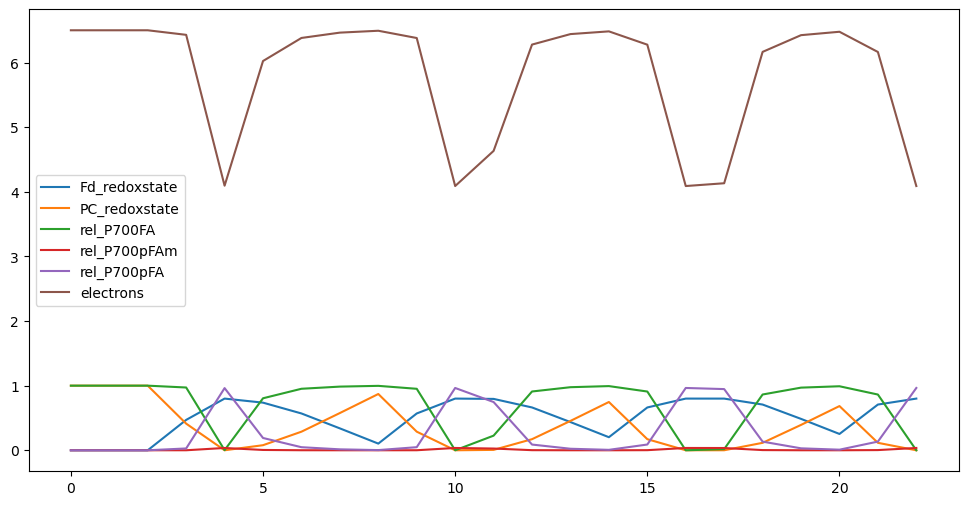

In [12]:
results["electrons"] = electrons

fig, ax = plt.subplots()
results.loc[:,["Fd_redoxstate", "PC_redoxstate", "rel_P700FA", "rel_P700pFAm", "rel_P700pFA", "electrons"
                #"e_tot"
                ]].plot(ax=ax, figsize=(12, 6))


In [10]:
save_fig(fig, model, "moeities", f"plot")

existing figure backed up to figures/PSI_only_QSSA/moeities/Z_backup_plot.png
saved figure to figures/PSI_only_QSSA/moeities/plot.png


In [136]:
# results.loc[:,["Fd", "PC", "P700FA", "P700pFAm", "P700pFA"]]

<Axes: >

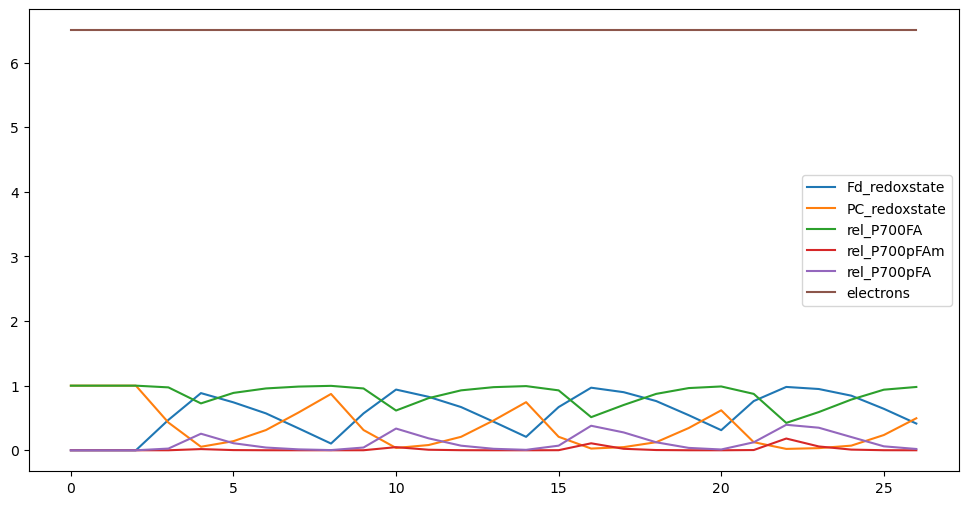

In [ ]:
# plot the number of electrons in the system for all time points
